## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까?

#### 데이터 수집
- 한국관광공사, [한국관광 데이터랩 데이터](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do#)

#### 데이터 로드 및 전처리
- (★)분석 전 가장 중요한 단계, 데이터 분석의 8할은 전처리
- Data Preprocessing : 분석에 적합하도록 원하는(쉬운) 형태로 데이터를 가공하는 과정
    - 결측치처리(None, Null, Nan) 처리, 이상치 처리, 변수 정규화, 파생변수 생성

##### 엑셀 파일 로드

In [ ]:
!pip install matplotlib
!pip install pandas

In [ ]:
# 판다스 사용
import pandas as pd

In [ ]:
# 1. 엑셀파일 경로지정해서 읽어오기
kto_201901 = pd.read_excel('./data/kto_201901.xlsx', header=1, usecols='A:G',skipfooter=4)
kto_201901

In [ ]:
kto_201901.head()

In [ ]:
kto_201901.tail()

데이터 탐색(전처리를 위한)

In [ ]:
# DF 각 정보 개요
kto_201901.info()

In [ ]:
# DF 각 통계치
kto_201901.describe()

In [ ]:
# 한번도 한국에 방문한 적이 없는 대륙, 나라(목적별)
# 문자열 여러줄, 논리연산 여러줄 작성 시 \ 붙여주어야함
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | \
            (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)

In [ ]:
## cmap pandas DF 컬러맵
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''

In [ ]:
kto_201901[condition]
kto_201901.style.background_gradient(axis=None, vmin=0, vmax=200_000,cmap='coolwarm')

In [ ]:
## 2. 기준년월 컬럼 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

In [ ]:
## 3. 국적데이터만 추출
kto_201901['국적'].unique()

In [ ]:
## 별로 안 좋은 방법
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

In [ ]:
continent_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continent_list

In [ ]:
## 대륙을 뺀 국적리스트
kto_201901['국적']

In [ ]:
kto_201901.국적

In [ ]:
## 4. 대륙 외 국적들만 뽑아내기
condition = kto_201901['국적'].isin(continent_list)==False
kto_201901_countries = kto_201901[condition]
kto_201901_countries['국적'].unique()

In [ ]:
# 중간에 비는 인덱스없이 다시 지정, inplace=True 기존 데이터를 대체해줌
kto_201901_countries.reset_index(drop=True, inplace=True)

In [ ]:
kto_201901_countries

In [ ]:
## 5. 대륙칼럼 추가 사전작업
for i in continent_list:
    print(i)

In [ ]:
# 대륙 리스트 재구성
continents =['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']

In [ ]:
## SettingWithCopyWarning 해제하는 법
pd.set_option('mode.chained_assignment',None)

In [ ]:
# 5. 국적 간 데이터 DF 마지막에 대륙 컬럼 추가
kto_201901_countries['대륙'] = continents
kto_201901_countries

In [ ]:
## 6. 국적별 관광객 비율 컬럼 추가
kto_201901_countries['관광객 비율(%)'] = round(kto_201901_countries['관광'] / kto_201901_countries['계'] * 100, 1)

In [ ]:
kto_201901_countries.sort_values(by='관광', ascending=False)

In [ ]:
## 관광객 비율이 높은 나라 Top 5
kto_201901_countries.sort_values(by='관광객 비율(%)', ascending=False)

In [ ]:
## 관광객 비율이 낮은 나라 Top 5
kto_201901_countries.sort_values(by='관광객 비율(%)', ascending=True)

In [ ]:
## 전체 외국인 관광객 수
totalSum = sum(kto_201901_countries['관광'])

In [ ]:
## 중국만 필터링
condition = kto_201901_countries['국적'] == '중국'
kto_201901_countries[condition]

In [ ]:
## 7. 전체 비율(%) 계산
kto_201901_countries['전체 비율(%)'] = round(kto_201901_countries['관광'] / totalSum *100 , 1)
kto_201901_countries

In [ ]:
# 관광객 수가 가장 많은 국적 Top10
kto_201901_countries.sort_values(by='전체 비율(%)', ascending= False).head(10)

In [ ]:
## 125개 데이터를 전부 확인 불가
## 샘플링 조회
kto_201901 = pd.read_excel('./data/kto_202002.xlsx', header=1, usecols='A:G',skipfooter=4)
kto_201901.info()

##### 종합
- 위에서 하나의 엑셀로 처리한 방식을 반복문을 통해서 전체 125개의 데이터를 통합하는 작업
- 1~7까지의 작업을 하나의 함수로 생성

In [ ]:
## 년월별 데이터 전처리함수
from pydantic import FilePath


def createKtoData(yyyy,mm):
    # 1-1. 엑셀파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx'
    # 1-2. 엑셀파일 불러오기
    df = pd.read_excel(filePath, header=1, usecols='A:G', skipfooter=4)
    # 2. 기준년월 컬럼 추가
    df['기준년월'] = f'{yyyy}-{mm:02d}'
    # 3. 국적컬럼 대룩제거, 국가만 추출
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    ## 대륙제거
    condition = (df['국적'].isin(ignore_list)==False)
    df_countries = df[condition].reset_index(drop=True)
    # 5. 대륙컬럼 추가
    continents =['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_countries['대륙'] = continents
    # 6. 국적별 관광객 비율 컬럼 추가
    df['관광객 비율(%)'] = round(df_countries['관광'] / df_countries['계'] * 100, 1)
    # 7. 전체 비율 계산
    totalSum = sum(df_countries['관광'])
    df['전체 비율(%)'] = round(df_countries['관광'] / totalSum *100 , 1)

    # 8. 결과 리턴
    return(df_countries)

In [ ]:
## 테스트
df_test = createKtoData(2018,8)
df_test

In [ ]:
## 반복문으로 기준년월 출력
for yyyy in range(2010,2021):
    for mm in range(1,13):
        print(yyyy,mm)

##### tqdm 라이브러리
- 프로그레스바

In [ ]:
from tqdm import tqdm
import time

In [ ]:
text = ''
strList = ['H', 'e', 'l', 'l', 'o', 'P', 'y', 't', 'h', 'o', 'n']
for char in tqdm(strList):
    text = text + char
    time.sleep(0.5)

In [ ]:
## 빈 DF
df_total = pd.DataFrame()

In [ ]:
df_total

In [ ]:
for yyyy in tqdm(range(2010,2021)):
    for mm in range(1,13):
        try:
            temp = createKtoData(yyyy, mm)
            df_total = pd.concat([df_total, temp], ignore_index=True)
        except:
            pass

In [ ]:
df_total.info()

In [ ]:
## 파일 저장
df_total.to_excel('./data/kto_total.xlsx', index=False)

In [ ]:
## 중국 국적 데이터만 추출
condition = df_total['국적']== '중국'

In [ ]:
df_china = df_total[condition]

In [ ]:
df_china.reset_index(inplace= True)

In [ ]:
df_china

#### 데이터 시각화 / 분석
- 필요 요소 분석
- 시각화, 결론 도출

##### Matplotlib 시각화
- 필요 라이브러리 가져오기
- 한글 깨짐현상 해결

In [ ]:
!pip install seaborn

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path  = 'C:/Windows/Fonts/.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\.ttf'

In [ ]:
# 차트  스타일 지정
sns.set_style('darkgrid')

In [ ]:
# list comprehesion
[f'{i}-01' for i in range(2010,2021)]

In [314]:
## 불필요한
import warnings
warnings.filterwarnings('ignore')

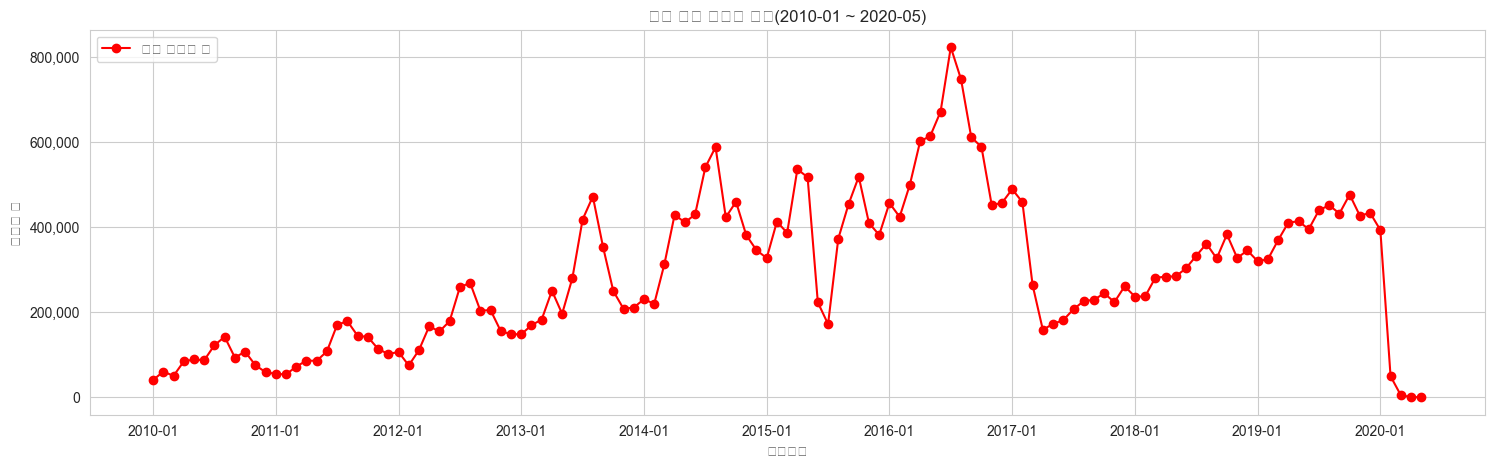

In [318]:
## 데이터 차트 다듬기
## 그래프 크기조절
from cProfile import label
from folium import Marker
from matplotlib.lines import lineStyles
from numpy import rot90
sns.set_style('whitegrid')

plt.figure(figsize=(18,5)) # w:18, h:5
## 그래프 내용 설정
plt.plot(df_china['기준년월'], df_china['관광'], label='중국 관광객 수', color = 'r', marker='o')
## 타이틀, 라벨, 범례 추가
plt.title('중국 국적 관광객 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')
plt.legend(loc='upper left')
## x축 라벨
plt.xticks([f'{i}-01' for i in range(2010,2021)])
## y축 라벨(1000단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()

In [ ]:
## pandas DF를 자동으로 차트로 만들어 주는 것
df_china.plot()
plt.show()